In [1]:
%load_ext rpy2.ipython
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%R
library(prophet)

There are two main ways that outliers can affect Prophet forecasts. Here we make a forecast on the logged Wikipedia visits to the R page from before, but with a block of bad data:

Initial log joint probability = -28.5336
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


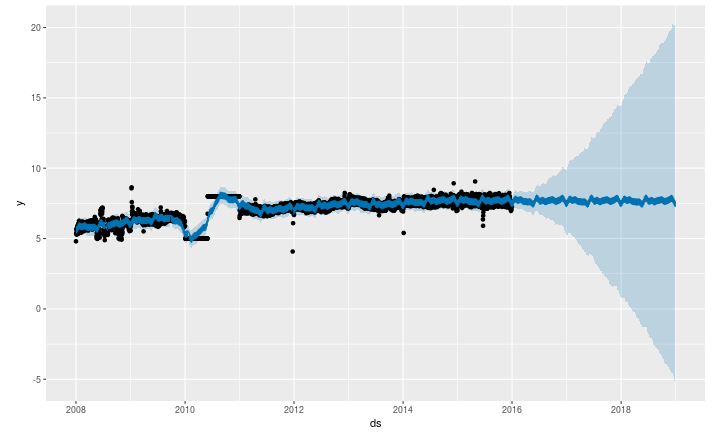

In [3]:
%%R -w 10 -h 6 -u in
df <- read.csv('../examples/example_wp_log_R_outliers1.csv')
m <- prophet(df)
future <- make_future_dataframe(m, periods = 1096)
forecast <- predict(m, future)
plot(m, forecast)

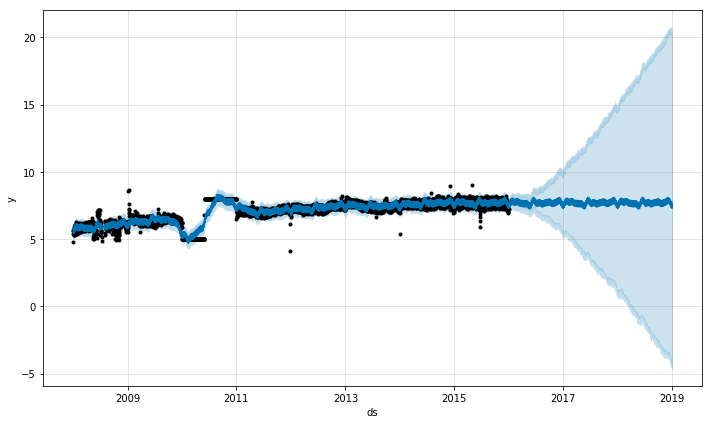

In [4]:
df = pd.read_csv('../examples/example_wp_log_R_outliers1.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

The trend forecast seems reasonable, but the uncertainty intervals seem way too wide. Prophet is able to handle the outliers in the history, but only by fitting them with trend changes. The uncertainty model then expects future trend changes of similar magnitude.

The best way to handle outliers is to remove them - Prophet has no problem with missing data. If you set their values to `NA` in the history but leave the dates in `future`, then Prophet will give you a prediction for their values.

Initial log joint probability = -21.2638
Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


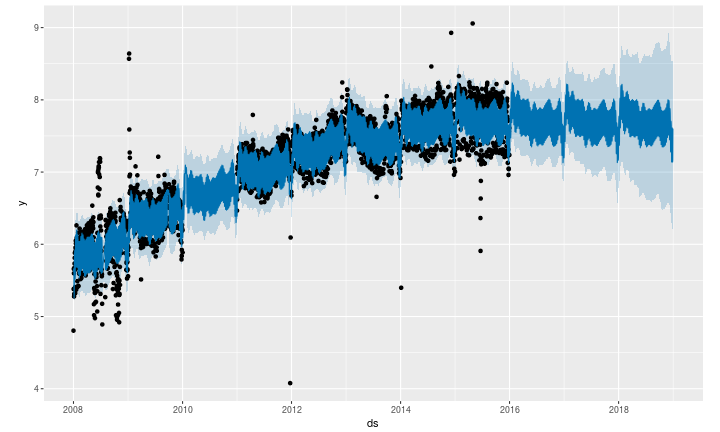

In [5]:
%%R -w 10 -h 6 -u in
outliers <- (as.Date(df$ds) > as.Date('2010-01-01')
             & as.Date(df$ds) < as.Date('2011-01-01'))
df$y[outliers] = NA
m <- prophet(df)
forecast <- predict(m, future)
plot(m, forecast)

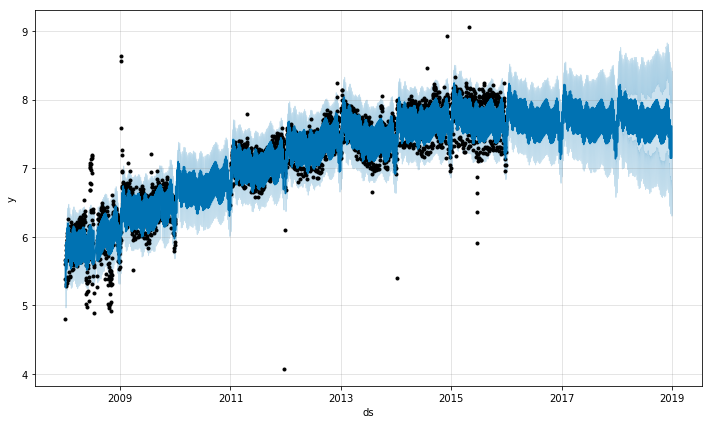

In [6]:
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))

In the above example the outliers messed up the uncertainty estimation but did not impact the main forecast `yhat`. This isn't always the case, as in this example with added outliers:

Initial log joint probability = -27.5907
Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


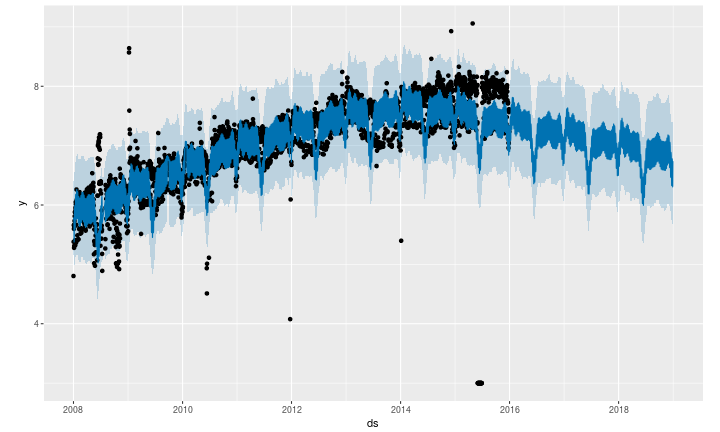

In [7]:
%%R -w 10 -h 6 -u in
df <- read.csv('../examples/example_wp_log_R_outliers2.csv')
m <- prophet(df)
future <- make_future_dataframe(m, periods = 1096)
forecast <- predict(m, future)
plot(m, forecast)

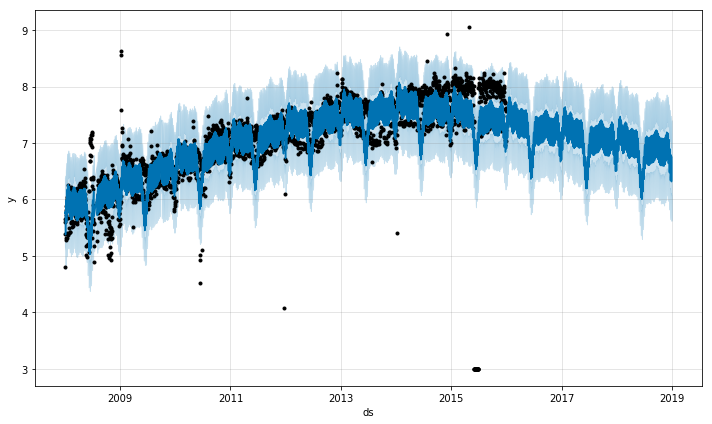

In [8]:
df = pd.read_csv('../examples/example_wp_log_R_outliers2.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

Here a group of extreme outliers in June 2015 mess up the seasonality estimate, so their effect reverberates into the future forever. Again the right approach is to remove them:

Initial log joint probability = -24.7625
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


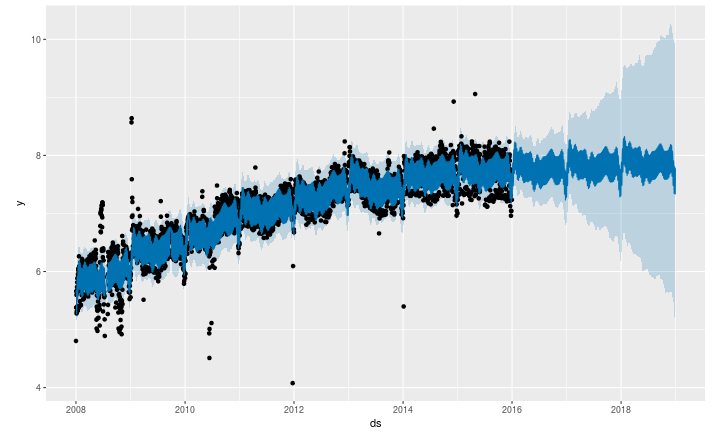

In [9]:
%%R -w 10 -h 6 -u in
outliers <- (as.Date(df$ds) > as.Date('2015-06-01')
             & as.Date(df$ds) < as.Date('2015-06-30'))
df$y[outliers] = NA
m <- prophet(df)
forecast <- predict(m, future)
plot(m, forecast)

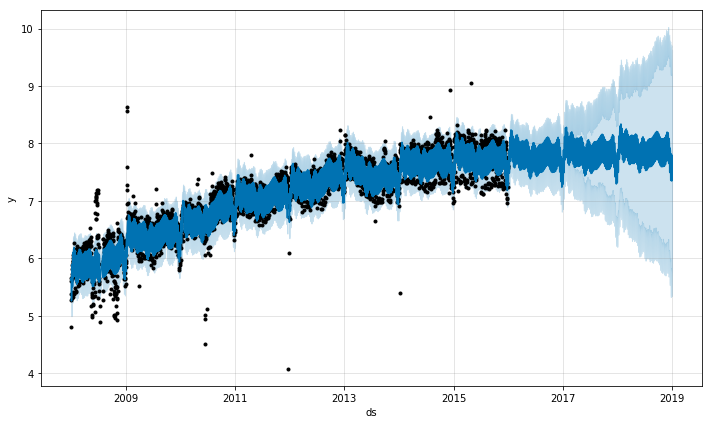

In [10]:
df.loc[(df['ds'] > '2015-06-01') & (df['ds'] < '2015-06-30'), 'y'] = None
m = Prophet().fit(df)
fig = m.plot(m.predict(future))